In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('indeed_job_dataset.csv')
df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [11]:
df.count

<bound method DataFrame.count of       Unnamed: 0                                          Job_Title  \
0              0                                     Data Scientist   
1              1                                     Data Scientist   
2              2                                     Data Scientist   
3              3          Graduate Studies Program - Data Scientist   
4              4                                   Data Scientist I   
...          ...                                                ...   
5710        5710                               Senior Data Engineer   
5711        5711  Principal Data Engineer (Java, Spark, Storm, AWS)   
5712        5712  Executive Director- Architect: Data Engineerin...   
5713        5713        Senior Manager, Data Engineering (hands on)   
5714        5714  Principal Visual Analytics / Big Data Engineer...   

                                                   Link Queried_Salary  \
0     https://www.indeed.com/rc/clk?jk=6

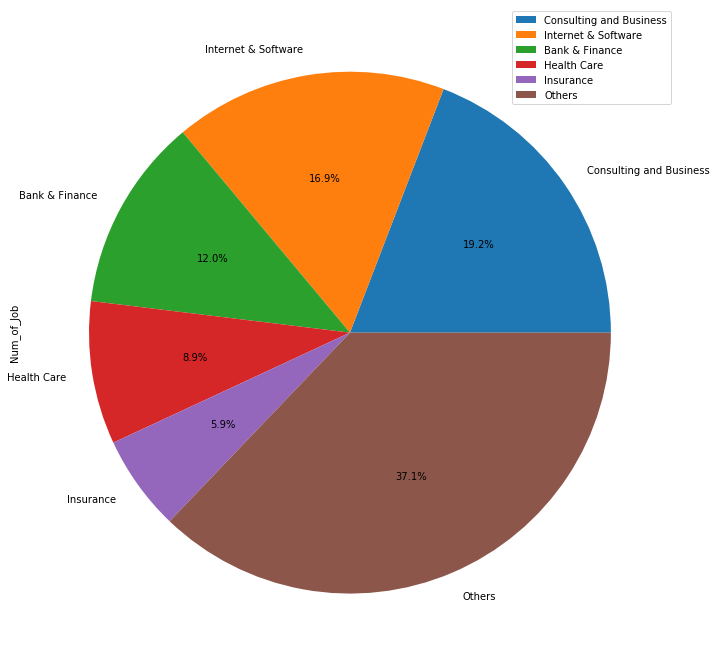

In [3]:
consult_count = df["Consulting and Business Services"].value_counts()[1]
internet_count = df["Internet and Software"].value_counts()[1]
bank_count = df["Banks and Financial Services"].value_counts()[1]
health_count = df["Health Care"].value_counts()[1]
insurance_count = df["Insurance"].value_counts()[1]
others_count = df["Other_industries"].value_counts()[1]

various_industries = pd.DataFrame( {"Num_of_Job": [consult_count, internet_count, bank_count, health_count, insurance_count, others_count]},
     index = ['Consulting and Business', "Internet & Software", "Bank & Finance", "Health Care", "Insurance", "Others"]
)

various_industries.plot.pie(y="Num_of_Job", figsize=(12,12), autopct="%1.1f%%")

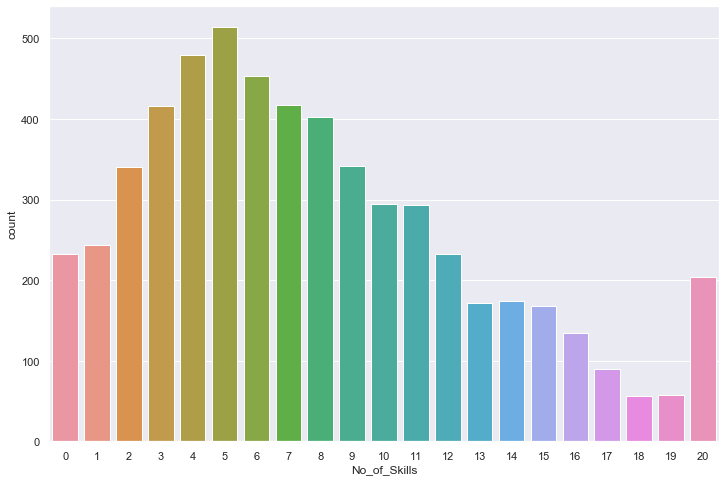

In [4]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
ax = sns.countplot(x="No_of_Skills", data=df)

In [5]:
df['Skill'].head(20)

0                                        ['SAP', 'SQL']
1     ['Machine Learning', 'R', 'SAS', 'SQL', 'Python']
2     ['Data Mining', 'Data Management', 'R', 'SAS',...
3                        ['Certified Internal Auditor']
4     ['Statistical Software', 'Time Management', 'R...
5     ['AI', 'Quantitative Analysis', 'Data Mining',...
6     ['Statistical Software', 'Machine Learning', '...
7                      ['Machine Learning', 'R', 'SQL']
8                     ['Linux', 'R', 'C/C++', 'Python']
9     ['JavaScript', 'Data Mining', 'TS/SCI Clearanc...
10    ['Machine Learning', 'R', 'SPSS', 'Data Analys...
11    ['Machine Learning', 'R', 'SPSS', 'Data Analys...
12    ['Machine Learning', 'Analysis Skills', 'Data ...
13                       ['Machine Learning', 'Python']
14    ['TensorFlow', 'Project Planning', 'Linux', 'M...
15    ['Machine Learning', 'R', 'Statisical Analysis...
16    ['Machine Learning', 'R', 'SQL', 'Analysis Ski...
17    ['Microsoft SQL Server', 'Data Mining', 'M

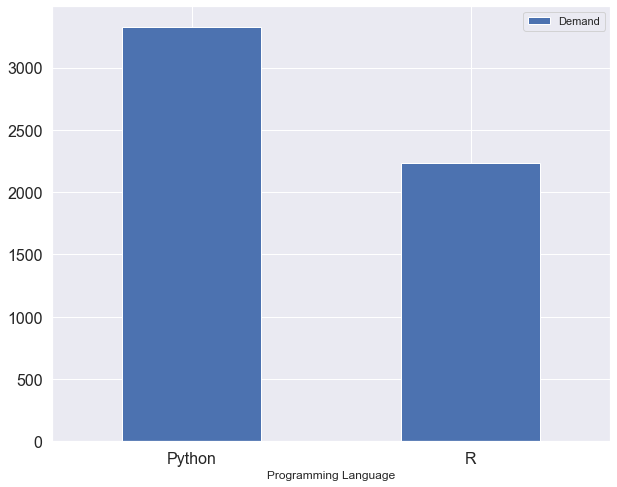

In [6]:
python_count = df["python"].value_counts()[1]
r_count = df["r"].value_counts()[1]

languages = pd.DataFrame({'Programming Language': ['Python', 'R'], 'Demand': [python_count, r_count]})
ax = languages.plot.bar(x='Programming Language', y='Demand' , figsize=(10,8), rot=0, fontsize=16)

Text(0.5, 1.0, 'Expected RDBMS Skill in Data Science Job Market')

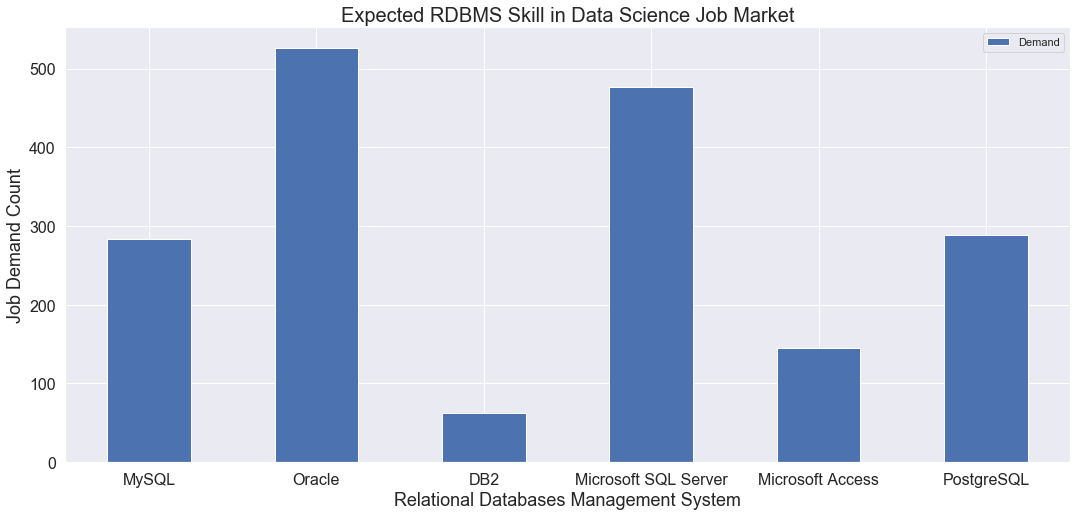

In [7]:
mysql_count = df['Skill'].str.contains('MySQL').value_counts()[1]
oracle_count = df['Skill'].str.contains('Oracle').value_counts()[1]
db2_count = df['Skill'].str.contains('DB2').value_counts()[1]
sqlserver_count = df['Skill'].str.contains('Microsoft SQL Server').value_counts()[1]
access_count = df['Skill'].str.contains('Microsoft Access').value_counts()[1]
postgre_count = df['Skill'].str.contains('PostgreSQL').value_counts()[1]

rdbms_name_list = ['MySQL', 'Oracle', 'DB2', 'Microsoft SQL Server', "Microsoft Access", "PostgreSQL"]
rdbms_demand_list = [mysql_count, oracle_count, db2_count, sqlserver_count, access_count, postgre_count]
rdbmsDF = pd.DataFrame({'RDBMS': rdbms_name_list, 'Demand': rdbms_demand_list})
ax = rdbmsDF.plot.bar(x='RDBMS', y='Demand' , figsize=(18,8), rot=0, fontsize=16)
ax.set_ylabel("Job Demand Count", fontsize=18)
ax.set_xlabel("Relational Databases Management System", fontsize=18)
ax.set_title("Expected RDBMS Skill in Data Science Job Market", fontsize=20)

Text(0.5, 1.0, 'Expected NoSQL DBMS Skill in Data Science Job Market')

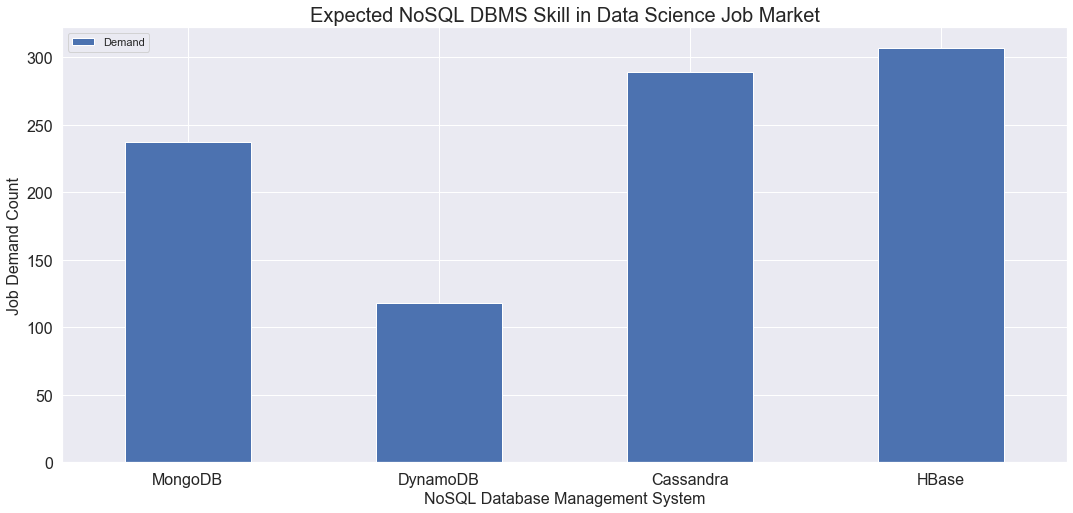

In [8]:
mongo_count = df['Skill'].str.contains('MongoDB').value_counts()[1]
dynamo_count = df['Skill'].str.contains('DynamoDB').value_counts()[1]
cassandra_count = df['Skill'].str.contains('Cassandra').value_counts()[1]
hbase_count = df['Skill'].str.contains('HBase').value_counts()[1]

nsdbms_name_list = ['MongoDB', 'DynamoDB', 'Cassandra', 'HBase']
nsdbms_demand_list = [mongo_count, dynamo_count, cassandra_count, hbase_count]
nsdbmsDF = pd.DataFrame({'NSDBMS': nsdbms_name_list, 'Demand': nsdbms_demand_list})
ax = nsdbmsDF.plot.bar(x='NSDBMS', y='Demand' , figsize=(18,8), rot=0, fontsize=16)
ax.set_ylabel("Job Demand Count", fontsize=16)
ax.set_xlabel("NoSQL Database Management System", fontsize=16)
ax.set_title("Expected NoSQL DBMS Skill in Data Science Job Market", fontsize=20)

Text(0.5, 1.0, 'Expected Statistical Software Skill in Data Science Job Market')

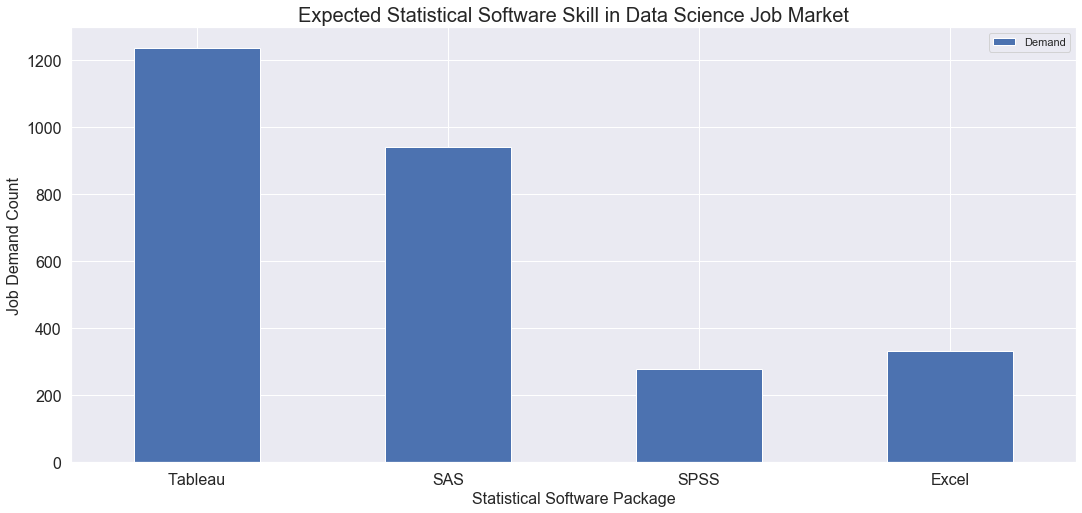

In [9]:
tableau_count = df['Skill'].str.contains('Tableau').value_counts()[1]
sas_count = df['Skill'].str.contains('SAS').value_counts()[1]
spss_count = df['Skill'].str.contains('SPSS').value_counts()[1]
excel_count = df['Skill'].str.contains('Excel').value_counts()[1]

statsSoftware_name_list = ['Tableau', 'SAS', 'SPSS', 'Excel']
statsSoftware_demand_list = [tableau_count, sas_count, spss_count, excel_count]
statsSoftwareDF = pd.DataFrame({'Software': statsSoftware_name_list, 'Demand': statsSoftware_demand_list})
ax = statsSoftwareDF.plot.bar(x='Software', y='Demand' , figsize=(18,8), rot=0, fontsize=16)
ax.set_ylabel("Job Demand Count", fontsize=16)
ax.set_xlabel("Statistical Software Package", fontsize=16)
ax.set_title("Expected Statistical Software Skill in Data Science Job Market", fontsize=20)

In [12]:
df['Skill'].str.contains('Machine Learning').value_counts()

False    3186
True     2297
Name: Skill, dtype: int64

Text(0.5, 1.0, 'Expected Cloud Computing Skill in Data Science Job Market')

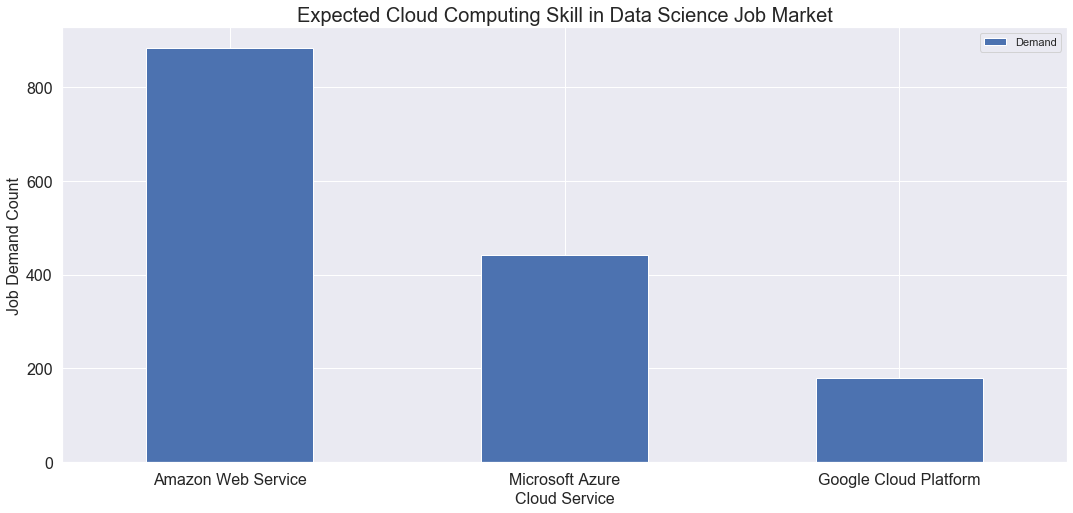

In [10]:
aws_count = df['Skill'].str.contains('AWS').value_counts()[1]
azure_count = df['Skill'].str.contains('Azure').value_counts()[1]
gcp_count = df['Skill'].str.contains('Google Cloud').value_counts()[1]


cloud_name_list = ['Amazon Web Service', 'Microsoft Azure', 'Google Cloud Platform']
cloud_demand_list = [aws_count, azure_count, gcp_count]
cloudDF = pd.DataFrame({'CloudService': cloud_name_list , 'Demand': cloud_demand_list})
ax = cloudDF.plot.bar(x='CloudService', y='Demand' , figsize=(18,8), rot=0, fontsize=16)
ax.set_ylabel("Job Demand Count", fontsize=16)
ax.set_xlabel("Cloud Service", fontsize=16)
ax.set_title("Expected Cloud Computing Skill in Data Science Job Market", fontsize=20)